In [2]:
pip install altair_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 12.7 MB/s eta 0:00:00


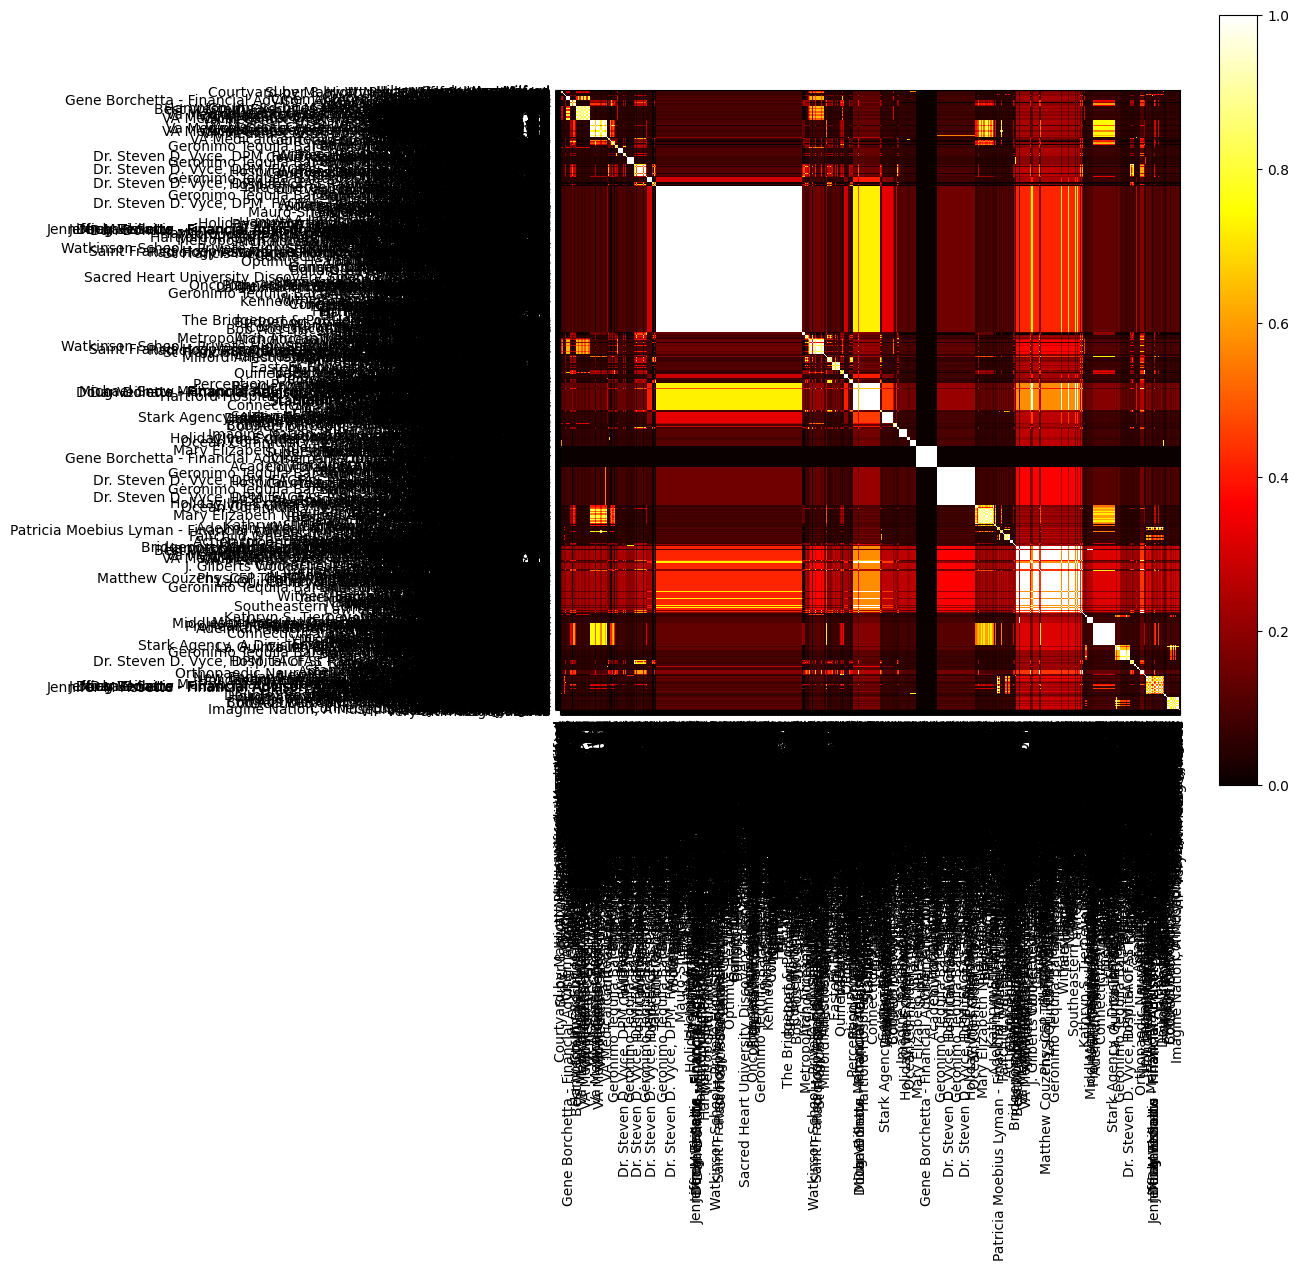

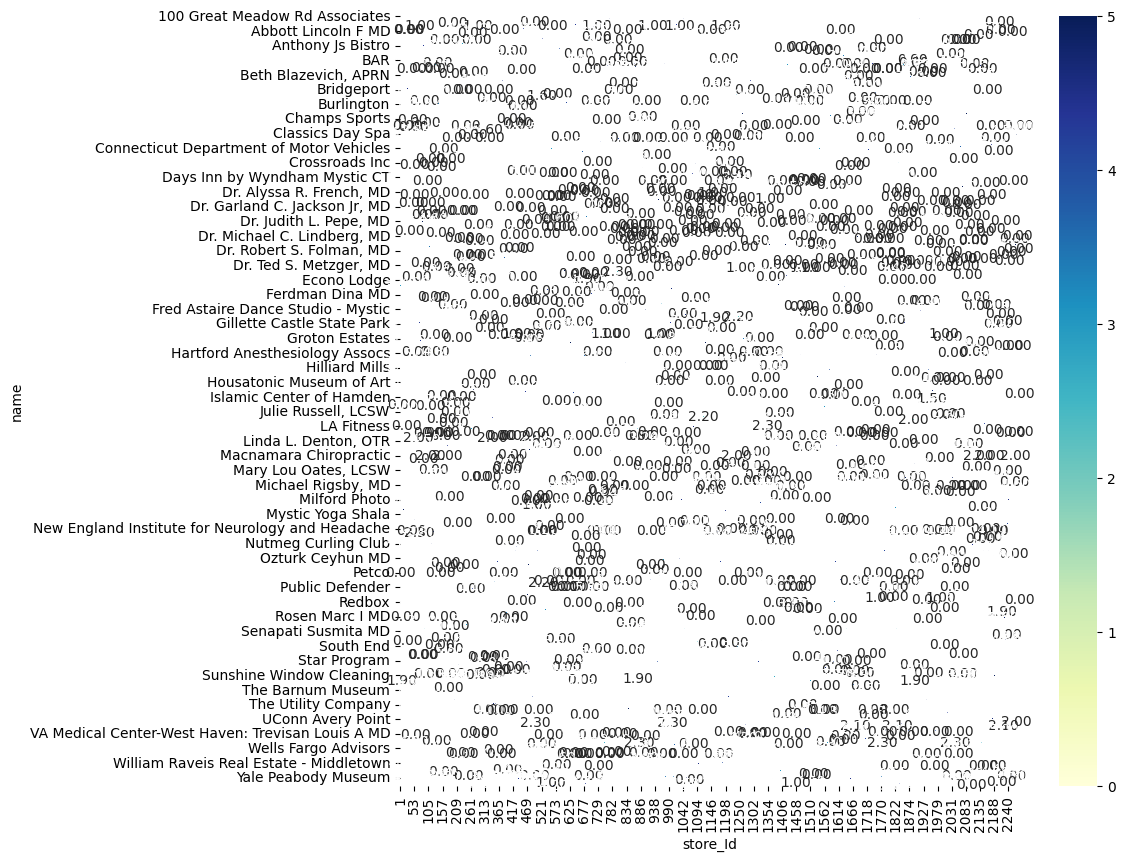

"\n# Define the recommendation function\ndef recommend_movies(name, cosine_sim=cosine_sim):\n    # Get the index of the movie\n    idx = indices[name]\n\n    # Get the cosine similarity scores of the movie\n    sim_scores = list(enumerate(cosine_sim[idx]))\n\n    # Sort the movies based on their similarity scores\n    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n\n    # Get the top 10 similar movies\n    sim_scores = sim_scores[1:11]\n\n    # Get the movie indices\n    movie_indices = [i[0] for i in sim_scores]\n\n    # Return the top 10 similar movies\n    return movies['name'].iloc[movie_indices]\n"

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import altair_viewer
# Load the data
movies = pd.read_csv('/content/Full_data_feature_no_user_id.csv')
ratings = pd.read_csv('/content/Full_data_ratings.csv')

# Merge the two dataframes on the movieId column
df = pd.merge(movies, ratings, on='store_Id')

# Group the data by movieId and aggregate the ratings
df = df.groupby('store_Id')['rating'].agg(['mean', 'count'])

# Merge the two dataframes on the movieId column
movies = pd.merge(movies, df, on='store_Id')

# Preprocess the data
movies['Features'] = movies['Features'].str.replace(',', ' ')
#movies['title'] = movies['title'].str.replace('(\(\d\d\d\d\))', '')
movies['name'] = movies['name'].apply(lambda x: x.strip())

# Vectorize the data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['Features'])

# Get the indices of the movies
indices = pd.Series(movies.index, index=movies['name'])

# Calculate the cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Visualize the cosine similarity matrix as a heatmap
plt.figure(figsize=(10,10))
plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.xticks(range(len(movies)), movies['name'], rotation=90)
plt.yticks(range(len(movies)), movies['name'])
plt.colorbar()
plt.show()

# Visualize the movie ratings as a heatmap
ratings_matrix = movies.pivot_table(index=['name'], columns=['store_Id'], values='mean')
plt.figure(figsize=(10,10))
sns.heatmap(ratings_matrix, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()


# Visualize the movie ratings as an interactive scatter plot
fig = px.scatter(movies, x='mean', y='count', color='name', hover_data=['store_Id'])
fig.show()

def recommend_movies(name, cosine_sim=cosine_sim):
    # Get the index of the movie
    idx = indices[name]

    # Get the cosine similarity scores of the movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0], reverse=True)

    # Get the top 10 similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 similar movies
    return movies['name'].iloc[movie_indices]

"""
# Define the recommendation function
def recommend_movies(name, cosine_sim=cosine_sim):
    # Get the index of the movie
    idx = indices[name]

    # Get the cosine similarity scores of the movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 similar movies
    return movies['name'].iloc[movie_indices]
"""


In [27]:

# 5. Test the recommendation system
movie_title = 'West Haven'  # Replace with the store title you want recommendations for
recommendations = recommend_movies(movie_title)
print("Recommended stores based on", movie_title, "are:")
print(recommendations)


Recommended stores based on West Haven are:
1                          Hilton Garden Inn Milford
9                                               ALDO
5               Super 8 by Wyndham Milford/New Haven
6                                             Zumiez
7                              Connecticut Post Mall
8                                         AT&T Store
2                    Hyatt Place Milford / New Haven
10                                     Hollister Co.
3     Courtyard by Marriott New Haven Orange/Milford
4                                Hampton Inn Milford
Name: name, dtype: object


In [29]:

# Choose a set of movies for which to calculate the ground truth
movie_set = ['West Haven']
# Determine the ground truth set of movies
ground_truth = {
    'West Haven': ['Hampton Inn Milford', 'Zumiez', 'Hilton Garden Inn Milford', 'Connecticut Post Mall','Costco Vision Center','Yale Bowl']
}

# Initialize variables for precision and recall
precision_total = 0
recall_total = 0


# Calculate precision and recall for each movie
for movie in movie_set:
    # Get the recommended movies
    recommended_movies = recommend_movies(movie)
    # Calculate precision
    relevant = set(ground_truth[movie])
    #relevant = any(elem in retrieved for elem in ground_truth[movie])
    retrieved = set(recommended_movies)
    true_positives = len(relevant & retrieved)
    false_positives = len(retrieved - relevant)
    precision = true_positives / (true_positives + false_positives)
    precision_total += precision

    # Calculate recall
    false_negatives = len(relevant - retrieved)
    recall = true_positives / (true_positives + false_negatives)
    recall_total += recall

    # Print the precision and recall for the movie
    print(f'{movie}: Precision = {precision:.2f}, Recall = {recall:.2f}')

# Calculate the average precision and recall for the movie set
num_movies = len(movie_set)
avg_precision = precision_total / num_movies
avg_recall = recall_total / num_movies

# Print the average

print(f'Average Precision = {avg_precision:.2f}, Average Recall = {avg_recall:.2f}')


West Haven: Precision = 0.40, Recall = 0.67
Average Precision = 0.40, Average Recall = 0.67
